<a href="https://colab.research.google.com/github/zainazeem41472/Rice-Leaf-Disease-Classification/blob/main/annsecondexperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for file in files:
        if "rice" in file.lower() or "leaf" in file.lower() or file.endswith(".zip"):
            print(os.path.join(root, file))


/content/drive/MyDrive/archive .zip
/content/drive/MyDrive/Rice leaf disease.zip


Input Layer  (flattened image)
Hidden Layer 1 (Dense)
Hidden Layer 2 (Dense)  <-- optional, depends on your code
Output Layer (Dense with 6 neurons)


In [ ]:
zip_path = "/content/drive/MyDrive/Rice leaf disease.zip"
!unzip -q "$zip_path" -d /content/RiceLeafDisease

In [ ]:
import os
for root, dirs, files in os.walk("/content/RiceLeafDisease"):
    print(root)
    break


/content/RiceLeafDisease


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
print(os.listdir("/content"))


['.config', 'drive', 'RiceLeafDisease', 'sample_data']


In [ ]:
import os

for root, dirs, files in os.walk("/content/RiceLeafDisease"):
    level = root.replace("/content/RiceLeafDisease", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 2 * (level + 1)
    for d in dirs:
        print(f"{subindent}{d}/")


RiceLeafDisease/
  RiceLeafsDisease/
  RiceLeafsDisease/
    train/
    validation/
    train/
      narrow_brown_spot/
      leaf_blast/
      brown_spot/
      bacterial_leaf_blight/
      healthy/
      leaf_scald/
      narrow_brown_spot/
      leaf_blast/
      brown_spot/
      bacterial_leaf_blight/
      healthy/
      leaf_scald/
    validation/
      narrow_brown_spot/
      leaf_blast/
      brown_spot/
      bacterial_leaf_blight/
      healthy/
      leaf_scald/
      narrow_brown_spot/
      leaf_blast/
      brown_spot/
      bacterial_leaf_blight/
      healthy/
      leaf_scald/


In [ ]:
base_dir = "/content/RiceLeafDisease/RiceLeafsDisease"
train_dir = base_dir + "/train"
val_dir = base_dir + "/validation"

print("Train exists:", os.path.exists(train_dir))
print("Validation exists:", os.path.exists(val_dir))
print("Train classes:", os.listdir(train_dir))
print("Validation classes:", os.listdir(val_dir))


Train exists: True
Validation exists: True
Train classes: ['narrow_brown_spot', 'leaf_blast', 'brown_spot', 'bacterial_leaf_blight', 'healthy', 'leaf_scald']
Validation classes: ['narrow_brown_spot', 'leaf_blast', 'brown_spot', 'bacterial_leaf_blight', 'healthy', 'leaf_scald']


In [ ]:
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 2100 images belonging to 6 classes.
Found 528 images belonging to 6 classes.


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),

    layers.Dense(512),
    LeakyReLU(alpha=0.1),      # LeakyReLU activation
    layers.Dropout(0.3),

    layers.Dense(256),
    LeakyReLU(alpha=0.1),      # LeakyReLU activation
    layers.Dropout(0.3),

    layers.Dense(6, activation="softmax")  # Output layer (do not change this)
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,203,718 (294.51 MB)

 Trainable params: 77,203,718 (294.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

epochs = 100  # train up to 100 epochs, EarlyStopping will stop early if no improvement

callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True),   # patience increased for longer training
    ModelCheckpoint("best_ann_model.h5", save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4020 - loss: 4.2928

66/66 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4021 - loss: 4.2910 - val_accuracy: 0.5265 - val_loss: 1.9164
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4256 - loss: 3.9470

66/66 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.4258 - loss: 3.9435 - val_accuracy: 0.5663 - val_loss: 1.7740
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4480 - loss: 3.1639

66/66 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4484 - loss: 3.1596 - val_accuracy: 0.5720 - val_loss: 1.2470
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4727 - loss: 2.4733 - val_accuracy: 0.4886 - val_loss: 2.1502
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4828 - loss: 2.5643

66/66 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.4828 - loss: 2.5621 - val_accuracy: 0.6307 - val_loss: 1.1083
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5054 - loss: 2.0125 - val_accuracy: 0.6155 - val_loss: 1.1406
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4907 - loss: 2.1879 - val_accuracy: 0.5720 - val_loss: 1.2218
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4976 - loss: 1.8918

66/66 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.4978 - loss: 1.8912 - val_accuracy: 0.5985 - val_loss: 1.0575
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5330 - loss: 1.8064 - val_accuracy: 0.5985 - val_loss: 1.1029
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4969 - loss: 1.9696 - val_accuracy: 0.5947 - val_loss: 1.1751
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4980 - loss: 1.7484 - val_accuracy: 0.5436 - val_loss: 1.1660
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.5260 - loss: 1.5711 - val_accuracy: 0.5606 - val_loss: 1.2974
Epoch 13/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5242 - loss: 1.6430 - val_accuracy: 0.5625 - val_loss: 1.1213
Epoch 14/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5403 - loss: 1.4195 - val_accuracy: 0.6061 - val_loss: 1.1481
Epoch 15/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5304 - loss: 1.3780 - val_accuracy: 0.5739 -

In [ ]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.2%}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 477ms/step - accuracy: 0.5880 - loss: 1.1017
Validation Loss: 1.0575
Validation Accuracy: 59.85%


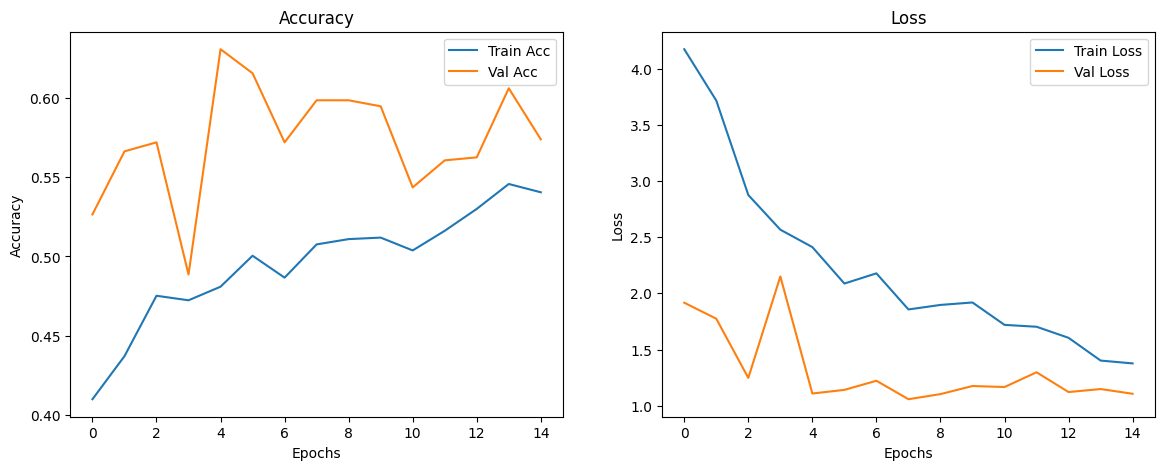

In [ ]:
plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Print final training and validation accuracy & loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")


Final Training Accuracy: 0.5405
Final Validation Accuracy: 0.5739
Final Training Loss: 1.3762
Final Validation Loss: 1.1060


In [ ]:
import pandas as pd

# Extract the last epoch results from history
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

results = pd.DataFrame({
    "Train Accuracy": [train_acc],
    "Validation Accuracy": [val_acc],
    "Train Loss": [train_loss],
    "Validation Loss": [val_loss],
})

results


,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,0.540476,0.573864,1.376243,1.106041


In [ ]:
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: "
          f"Train Acc = {history.history['accuracy'][i]:.4f}, "
          f"Val Acc = {history.history['val_accuracy'][i]:.4f}, "
          f"Train Loss = {history.history['loss'][i]:.4f}, "
          f"Val Loss = {history.history['val_loss'][i]:.4f}")


Epoch 1: Train Acc = 0.4100, Val Acc = 0.5265, Train Loss = 4.1728, Val Loss = 1.9164
Epoch 2: Train Acc = 0.4371, Val Acc = 0.5663, Train Loss = 3.7157, Val Loss = 1.7740
Epoch 3: Train Acc = 0.4752, Val Acc = 0.5720, Train Loss = 2.8751, Val Loss = 1.2470
Epoch 4: Train Acc = 0.4724, Val Acc = 0.4886, Train Loss = 2.5665, Val Loss = 2.1502
Epoch 5: Train Acc = 0.4810, Val Acc = 0.6307, Train Loss = 2.4115, Val Loss = 1.1083
Epoch 6: Train Acc = 0.5005, Val Acc = 0.6155, Train Loss = 2.0871, Val Loss = 1.1406
Epoch 7: Train Acc = 0.4867, Val Acc = 0.5720, Train Loss = 2.1778, Val Loss = 1.2218
Epoch 8: Train Acc = 0.5076, Val Acc = 0.5985, Train Loss = 1.8566, Val Loss = 1.0575
Epoch 9: Train Acc = 0.5110, Val Acc = 0.5985, Train Loss = 1.8968, Val Loss = 1.1029
Epoch 10: Train Acc = 0.5119, Val Acc = 0.5947, Train Loss = 1.9186, Val Loss = 1.1751
Epoch 11: Train Acc = 0.5038, Val Acc = 0.5436, Train Loss = 1.7192, Val Loss = 1.1660
Epoch 12: Train Acc = 0.5162, Val Acc = 0.5606, Trai

In [ ]:
model.save("/content/rice_leaf_ann_model.h5")
print("Model saved successfully!")


Model saved successfully!
